# Clustering
FIRA 빅데이터 플랫폼 과정 <데이터마이닝> - 2017.08.14.월 14:00-18:00

### 1. Data : 21.6 
- 1-1. `BathSoap.xlsx`
- 1-2. Data Load : `pd.read_xlsx`
- 1-3. Join Table : `pd.merge`
- 1-4. Delete Rows & Columns

### 2. Hierarchical Clustering 
- 2-1. `sklearn.cluster.AgglomerativeClustering`
- 2-2. Clustering with Dendrogram : `scipy.cluster.hierarchy`

### 3. K-means
- 3-1. `sklearn.cluster.KMeans`

### 4. Analysis 
- 4-1. Choose K : Using Silhouette Plot
- 4-2. .groupby()

### 5. 실습 : 비누 판매 마케팅 전략 수립을 위한 데이터 분석
- 5-1. More Preprocessing
- 5-2. 비누 구매 고객 세분화
- 5-3. 타겟 클러스터 선정 및 마케팅 기획

### 1. Data
---
- 1-1. `BathSoap.xlsx`
- 1-2. Data Load : `pd.read_xlsx`
- 1-3. Join Table : `pd.merge`
- 1-4. Delete Rows & Columns

#### 1-1.  `BathSoap.xlsx`
---
- sheet3 : DM_Sheet, 멤버 정보 및 비누 구입 정보
- sheet4 : Durables, 멤버들의 비누 이외 타물품 소유 정보
---
비누를 구매한 고객들의 데이터를 토대로 군집화를 이용하여 효과적인 마케팅 전략을 수립하려고 한다. 총 600개의 표본을 각종 변수를 고려하여 치밀하게 표집하였다. 주어진 데이터는 각종 인구통계자료, 내구재 소유 자료, 제품의 카테고리와 각 브랜드에 대한 구매 데이터이다.

*Q. 군집화는 마케팅 전략을 세우는데 어떤 역할을 할 수 있는가?*

#### 1-2. Data Load : `pd.read_excel`
---
`BathSoap.xlsx` 파일에서 데이터가 있는 sheet를 DataFrame으로 변환
* pd.read_excel document 참고
* sheet 위치, header로 쓸 row를 잘 지정할 것
* row의 시작은 0

In [1]:
# import packages
import pandas as pd

In [2]:
# df
df = pd.read_excel('BathSoap.xlsx', 2, header = 2)
df

,Member id,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
0,1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.028037,0.000000,0.130841,0.339564
1,1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,...,0.347048,0.026834,0.016100,0.014311,0.000000,0.059034,0.000000,0.000000,0.080501,0.000000
2,1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,...,0.121212,0.033550,0.010823,0.008658,0.000000,0.000000,0.016234,0.000000,0.561688,0.003247
3,1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.600000,0.000000
4,1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,...,0.000000,0.000000,0.048193,0.000000,0.000000,0.000000,0.000000,0.000000,0.144578,0.000000
5,1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,...,0.099037,0.000000,0.006878,0.071527,0.000000,0.000000,0.000000,0.000000,0.066025,0.269601
6,1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,...,0.000000,0.022613,0.007538,0.000000,0.000000,0.000000,0.000000,0.000000,0.045226,0.103015
7,1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.008065,0.000000,0.895161,0.032258
8,1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,...,0.280294,0.000000,0.000000,0.015100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,1017460.0,1.0,3.0,5.0,1.0,4.0,7.0,3.0,4.0,1.0,...,0.462777,0.150905,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120724,0.026828


In [3]:
# durable_df
durable_df = pd.read_excel("BathSoap.xlsx", 3, header = 4)[:600] # 동일한 데이터가 600번 이후로 다시 반복됨
durable_df

,MEM,Unnamed: 1,Radio/Transistor with FM,Radio/Transistor without FM,Stereo/Mono Tape Recorder,Two-in-one,Hi-Fi System/Music System without Compact disk,Hi-Fi System/Music System with Comapct disk,Walkman with FM,Walkman without FM,...,Personal/Home Computers,Computer Printers,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher
0,1010010,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1010020,19,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1014020,23,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1014030,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1014190,10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1017020,13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1017110,11,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1017160,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1017360,17,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1017460,6,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1-3. Join Table : `pd.merge`
---
DM_Sheet와 Durables의 DataFrame을 통합
* 'Member id', 'MEM'을 기준으로 통합, Inner Join

In [4]:
# merged_df
merged_df = df.merge(durable_df, left_on = "Member id", right_on = "MEM", how = 'inner')
merged_df

# set_index
merged_df = merged_df.set_index("Member id")
merged_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Personal/Home Computers,Computer Printers,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### 1-4. Delete Rows & Columns
---
* Delete Rows : 결측치가 있는 행은 지울 것
* Delete Columns : 겹치거나 문제가 있는 열을 지울 것

In [5]:
# Delete Rows : no_nan_df
no_nan_df = merged_df[merged_df.isnull().sum(axis = 1) == 0]
no_nan_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Personal/Home Computers,Computer Printers,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
list(no_nan_df.columns)
# want to delete cols -> MEM, Unnamed: 1

['SEC',
 'FEH',
 'MT',
 'SEX',
 'AGE',
 'EDU',
 'HS',
 'CHILD',
 'CS',
 'Affluence Index',
 'No. of Brands',
 'Brand Runs',
 'Total Volume',
 'No. of  Trans',
 'Value',
 'Trans / Brand Runs',
 'Vol/Tran',
 'Avg. Price ',
 'Pur Vol No Promo - %',
 'Pur Vol Promo 6 %',
 'Pur Vol Other Promo %',
 'Br. Cd. 57, 144',
 'Br. Cd. 55',
 'Br. Cd. 272',
 'Br. Cd. 286',
 'Br. Cd. 24',
 'Br. Cd. 481',
 'Br. Cd. 352',
 'Br. Cd. 5',
 'Others 999',
 'Pr Cat 1',
 'Pr Cat 2',
 'Pr Cat 3',
 'Pr Cat 4',
 'PropCat 5',
 'PropCat 6',
 'PropCat 7',
 'PropCat 8',
 'PropCat 9',
 'PropCat 10',
 'PropCat 11',
 'PropCat 12',
 'PropCat 13',
 'PropCat 14',
 'PropCat 15',
 'MEM',
 'Unnamed: 1',
 'Radio/Transistor with FM',
 'Radio/Transistor without FM',
 'Stereo/Mono Tape Recorder',
 'Two-in-one',
 'Hi-Fi System/Music System without Compact disk',
 'Hi-Fi System/Music System with Comapct disk',
 'Walkman with FM',
 'Walkman without FM',
 'Discman with FM',
 'Discman without FM',
 'Video (VCP/VCR)',
 'Laser Discs VCD

In [7]:
# Delete columns : X_df
want_to_delete_cols = ['MEM', 'Unnamed: 1']
x_df = no_nan_df.drop(want_to_delete_cols, axis = 1)
list(x_df.columns)

['SEC',
 'FEH',
 'MT',
 'SEX',
 'AGE',
 'EDU',
 'HS',
 'CHILD',
 'CS',
 'Affluence Index',
 'No. of Brands',
 'Brand Runs',
 'Total Volume',
 'No. of  Trans',
 'Value',
 'Trans / Brand Runs',
 'Vol/Tran',
 'Avg. Price ',
 'Pur Vol No Promo - %',
 'Pur Vol Promo 6 %',
 'Pur Vol Other Promo %',
 'Br. Cd. 57, 144',
 'Br. Cd. 55',
 'Br. Cd. 272',
 'Br. Cd. 286',
 'Br. Cd. 24',
 'Br. Cd. 481',
 'Br. Cd. 352',
 'Br. Cd. 5',
 'Others 999',
 'Pr Cat 1',
 'Pr Cat 2',
 'Pr Cat 3',
 'Pr Cat 4',
 'PropCat 5',
 'PropCat 6',
 'PropCat 7',
 'PropCat 8',
 'PropCat 9',
 'PropCat 10',
 'PropCat 11',
 'PropCat 12',
 'PropCat 13',
 'PropCat 14',
 'PropCat 15',
 'Radio/Transistor with FM',
 'Radio/Transistor without FM',
 'Stereo/Mono Tape Recorder',
 'Two-in-one',
 'Hi-Fi System/Music System without Compact disk',
 'Hi-Fi System/Music System with Comapct disk',
 'Walkman with FM',
 'Walkman without FM',
 'Discman with FM',
 'Discman without FM',
 'Video (VCP/VCR)',
 'Laser Discs VCD/LD/DVD',
 'TV - Black 

### 2. Hierarchical Clustering 
---


#### 2-1. `sklearn.cluster.AgglomerativeClustering`
---
- Parameter
    - `n_cluster` - 클러스터의 개수
- Return : 모든 데이터의 Label

In [8]:
# import packages
from sklearn.cluster import AgglomerativeClustering

In [9]:
# parameter setting
n_cluster = 5

In [10]:
# sklearn_hc_model
sklearn_hc_model = AgglomerativeClustering(n_clusters = n_cluster) 
# 나는 이 모델을 쓸거다. 지금 모델 껍데기를 만들어 놓은 것이고, 여기에 데이터를 채워 넣으면 됨

In [11]:
# fit to model
sklearn_hc_model.fit(x_df) 
# fit은 데이터를 넣은 것. 즉, 자체적으로 덴드로그램 그려서 클러스터 5개되는 지점에서 끊어줘.

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward',
            memory=Memory(cachedir=None), n_clusters=5,
            pooling_func=<function mean at 0x7fd3c0226400>)

In [12]:
# get predicted labels
sklearn_hc_model.labels_

# sklearn_model.fit_predict(X_df) -> 클러스터링 결과까지 한방에 보여줘!!!
sklearn_hc_model.fit_predict(x_df) # 즉 fit해서 label까지 보여줌

array([2, 3, 1, 4, 2, 1, 2, 2, 0, 2, 1, 3, 1, 3, 2, 1, 1, 3, 3, 4, 2, 2, 0,
       4, 4, 1, 3, 3, 3, 2, 3, 2, 4, 1, 1, 3, 2, 2, 3, 4, 2, 3, 1, 4, 0, 2,
       4, 2, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 2, 1, 1, 1, 3, 3, 2, 1, 0, 2,
       3, 2, 3, 3, 2, 3, 2, 4, 2, 1, 2, 2, 0, 3, 2, 4, 1, 3, 0, 4, 1, 3, 0,
       2, 2, 2, 3, 1, 3, 2, 3, 3, 1, 0, 1, 3, 1, 1, 3, 3, 2, 1, 3, 3, 1, 1,
       2, 3, 2, 1, 2, 3, 1, 3, 0, 1, 0, 0, 3, 2, 1, 1, 1, 2, 2, 2, 2, 3, 2,
       3, 1, 1, 3, 3, 3, 1, 2, 2, 2, 2, 2, 4, 4, 2, 3, 3, 3, 2, 4, 2, 0, 1,
       1, 0, 1, 0, 3, 0, 2, 1, 3, 3, 2, 2, 2, 0, 3, 0, 3, 0, 3, 2, 1, 3, 2,
       1, 3, 1, 1, 0, 3, 3, 1, 4, 3, 1, 2, 3, 2, 1, 3, 3, 1, 0, 2, 2, 2, 2,
       1, 3, 1, 3, 2, 3, 1, 0, 4, 3, 2, 3, 3, 3, 0, 1, 2, 2, 2, 1, 1, 2, 4,
       3, 0, 1, 1, 2, 1, 1, 3, 1, 4, 3, 2, 2, 2, 3, 2, 2, 4, 2, 2, 4, 2, 4,
       1, 3, 2, 3, 1, 1, 2, 2, 2, 2, 1, 1, 3, 3, 3, 3, 2, 0, 1, 2, 2, 3, 3,
       1, 3, 2, 4, 0, 1, 3, 0, 1, 2, 2, 3, 3, 3, 3, 2, 2, 3, 2, 3, 3, 3, 1,
       3, 4,

In [13]:
# copy X_df to result_df -> 결과값으로 구한 label이 변수로 다시 들어가는 것을 방지하기 위해
result_df = x_df.copy()

# add result column to result_df
result_df["sklearn_hc_labels"] = sklearn_hc_model.labels_
result_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Computer Printers,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher,sklearn_hc_labels
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


#### 2-2. Clustering with Dendrogram : `scipy.cluster.hierarchy`
---
Steps
1. Linkage Matrix
2. Dendromgram & Set k
3. get predicted_labels 

##### Linkage Matrix : `scipy.cluster.hierarchy.linkage`

In [14]:
# import packages
from scipy.cluster.hierarchy import linkage

In [15]:
# Z = linkage(X, method)
z = linkage(x_df, 'centroid')

In [16]:
# What is Z, linkage?
z[:10]

array([[ 239.        ,  492.        ,    2.44948974,    2.        ],
       [ 552.        ,  600.        ,   18.31741733,    3.        ],
       [  45.        ,  515.        ,   19.77718811,    2.        ],
       [ 224.        ,  485.        ,   27.13671675,    2.        ],
       [ 309.        ,  428.        ,   34.64341681,    2.        ],
       [ 297.        ,  413.        ,   36.02888509,    2.        ],
       [ 360.        ,  588.        ,   37.32055277,    2.        ],
       [ 285.        ,  583.        ,   40.13342103,    2.        ],
       [  14.        ,   70.        ,   44.96090628,    2.        ],
       [ 411.        ,  601.        ,   46.23053478,    4.        ]])

239번째랑 492번째가 2.4494로 가장 가깝다. 총 2개의 클러스터를 합쳤다. 그러면서 601번째 데이터가 됨.
552번째랑 600번째(위에서 600이 된 클러스터)가 거리가 18.317로 가장 가깝다. 총 3개의 클러스터가 합쳐짐(1+2). 그러면서 602번째 데이터가 됨

In [17]:
# 마지막에 다 합쳐졌는지 보려면
z[-1]

array([  1190.       ,   1197.       ,  37519.0134491,    600.       ])

##### Dendrogram & Set k : `scipy.cluster.hierarchy.dendrogram`

In [18]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

In [19]:
def plot_dendrogram(title, xlabel, ylabel, Z, max_d=None, p=None):
    # Settings for figure
    plt.figure(figsize=(25, 10))
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Dendrogram
    if p:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
            truncate_mode = 'lastp',
            p=p,
            show_contracted = True
        )
    else:
        dendrogram(
            Z,
            leaf_rotation=90.,  # rotates the x axis labels
            leaf_font_size=8.,  # font size for the x axis labels
        )
    
    if max_d:
        plt.axhline(y=max_d, c='k')
    plt.show()

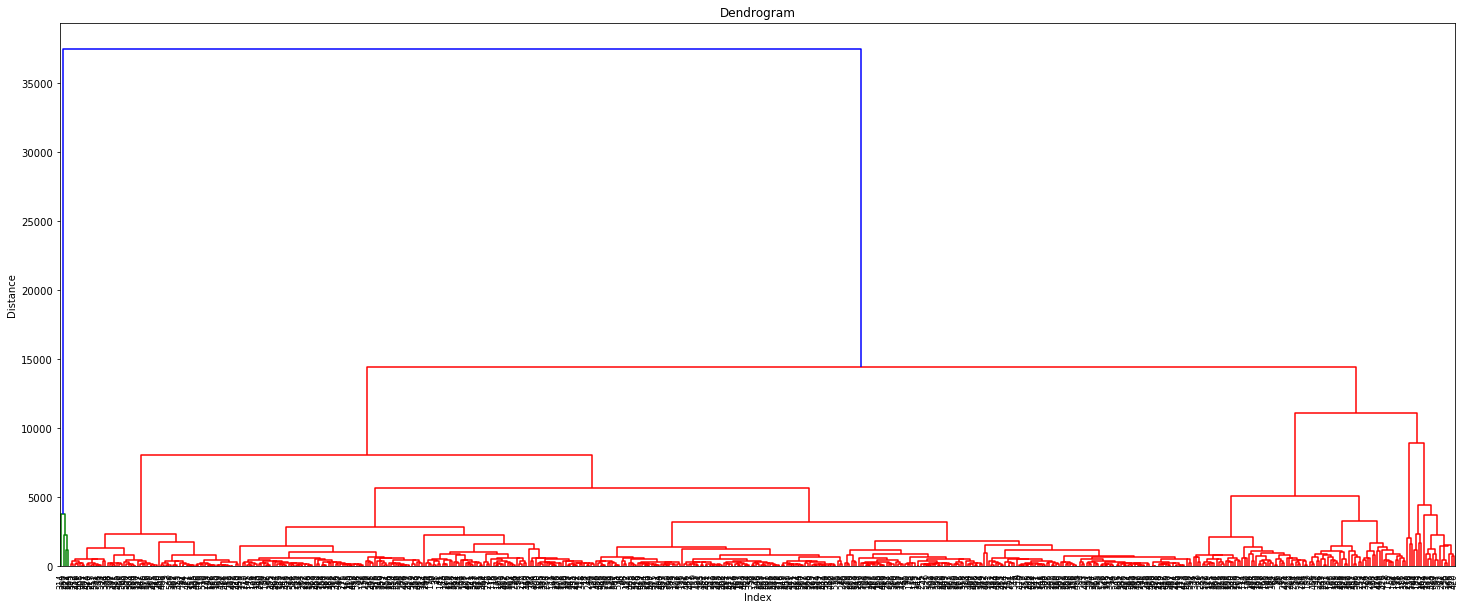

In [20]:
# plot dendrogram
plot_dendrogram("Dendrogram", "Index", "Distance", z)

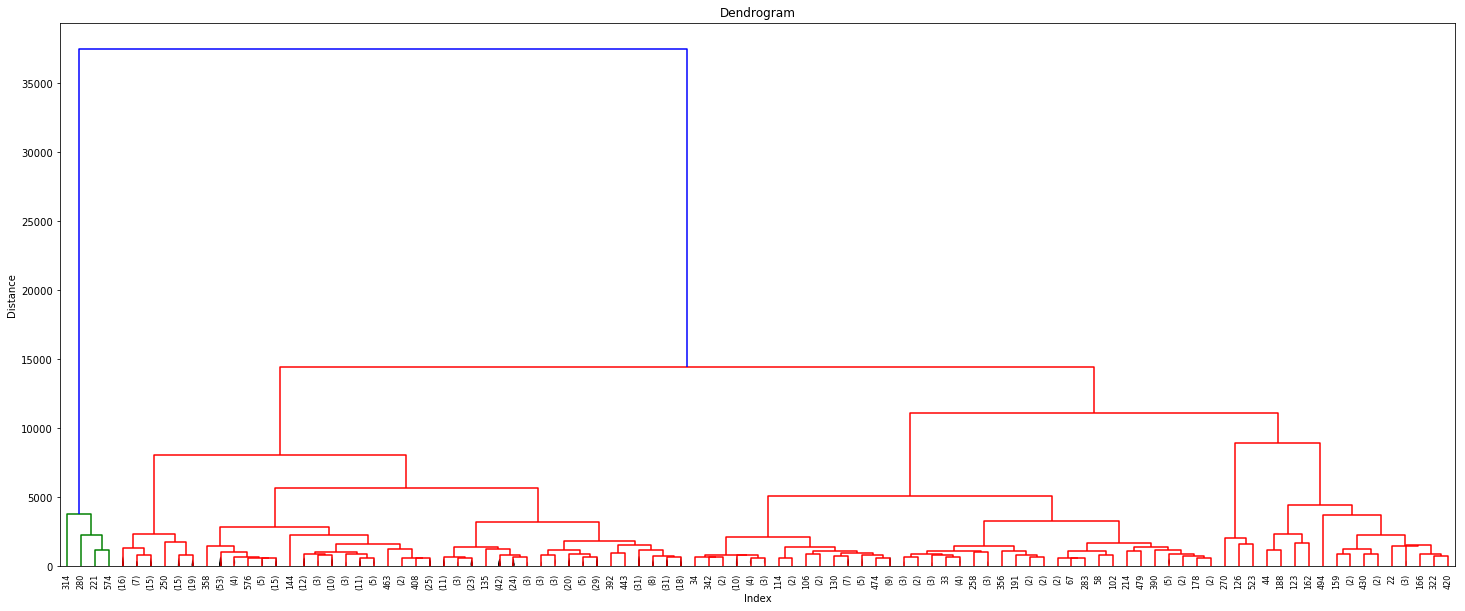

In [21]:
# Dendrogram에 표현할 가지의 개수 정하기 - set p
plot_dendrogram("Dendrogram", "Index", "Distance", z, p = 100) # 그냥 숫자는 해당 레코드 의미하고, (숫자)는 가지 안에 들어있는 레코드 수

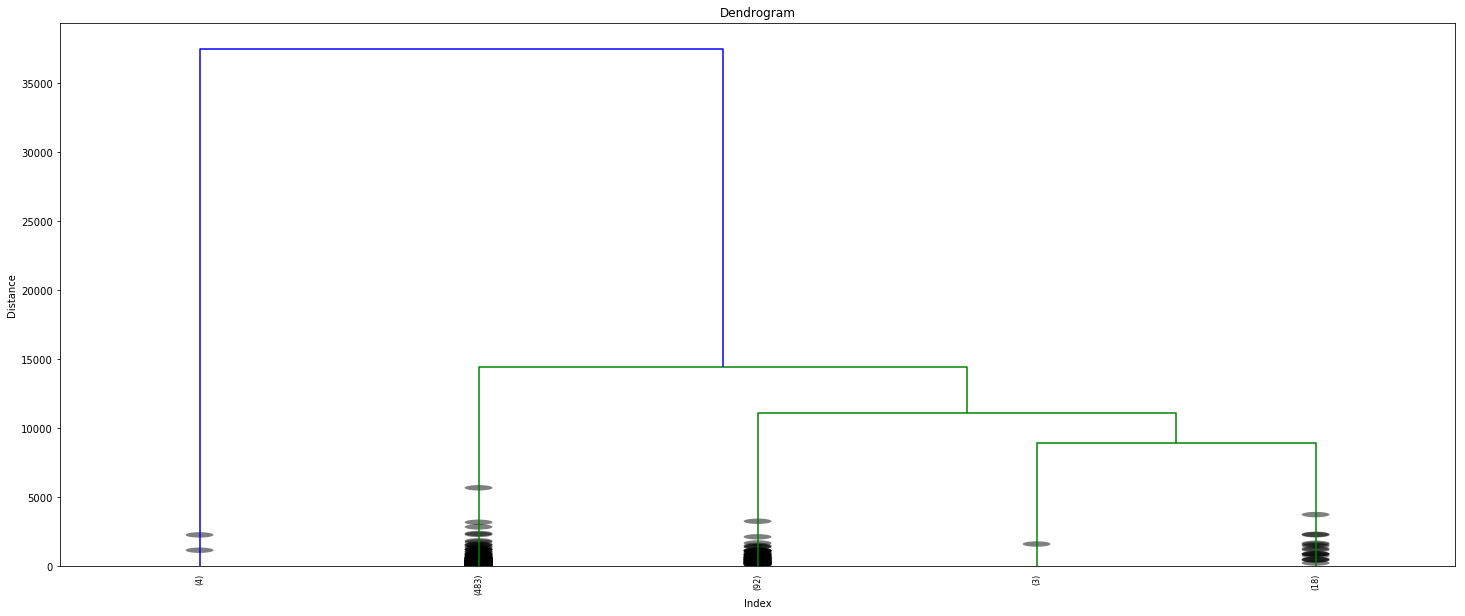

In [22]:
# k를 결정하기 위해, k보다 큰 개수의 p를 가진 dendrogram을 그리고, max_distance를 결정한다.
plot_dendrogram("Dendrogram", "Index", "Distance", z, p = 5)


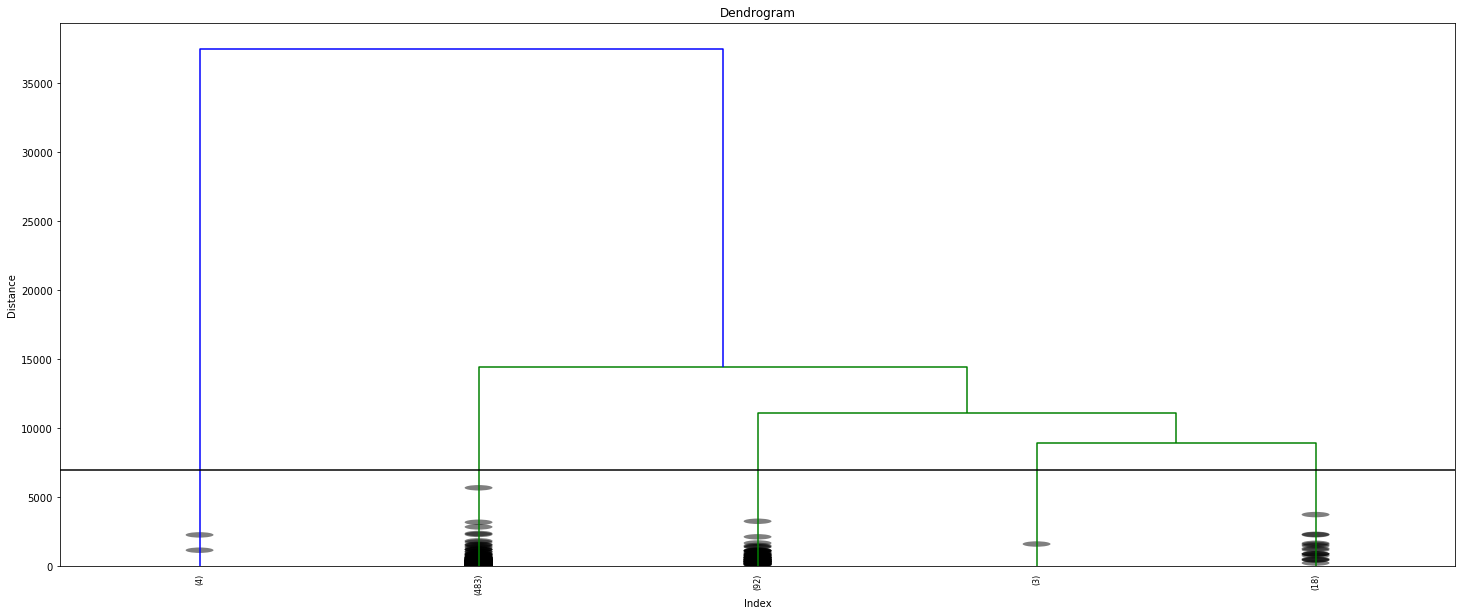

In [23]:
plot_dendrogram("Dendrogram", "Index", "Distance", z, p = 5, max_d = 7000)

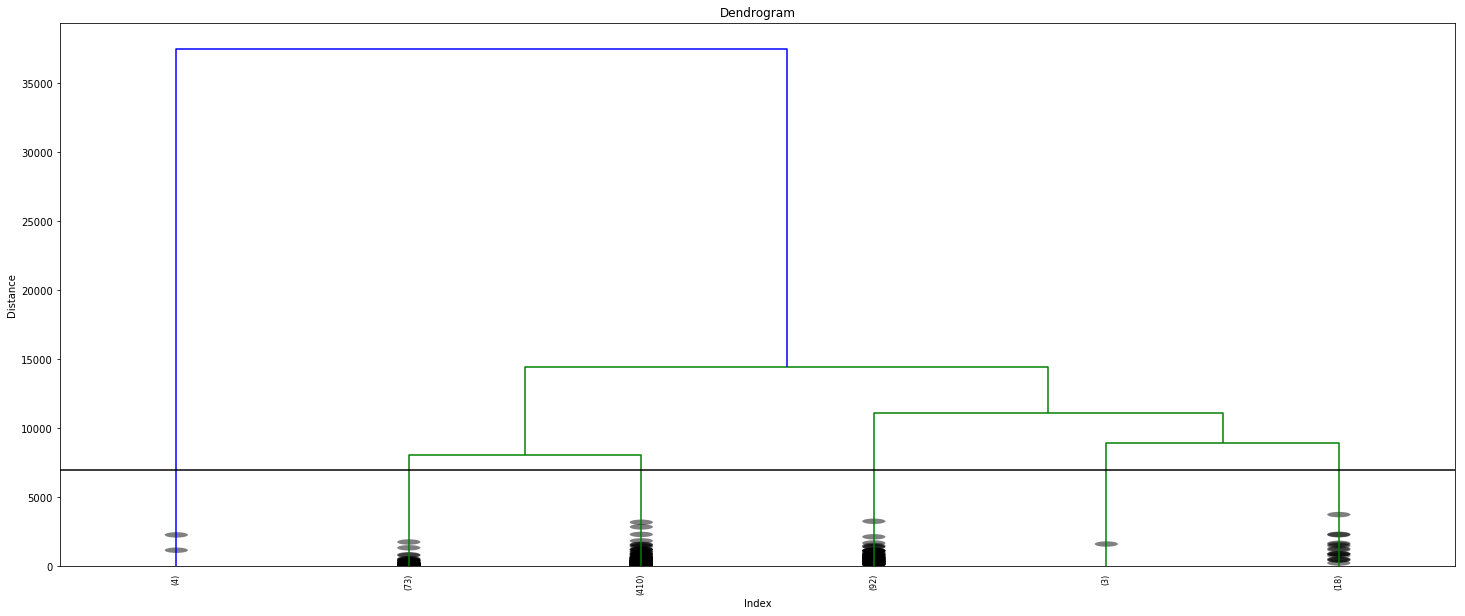

In [24]:
plot_dendrogram("Dendrogram", "Index", "Distance", z, p = 6, max_d = 7000)

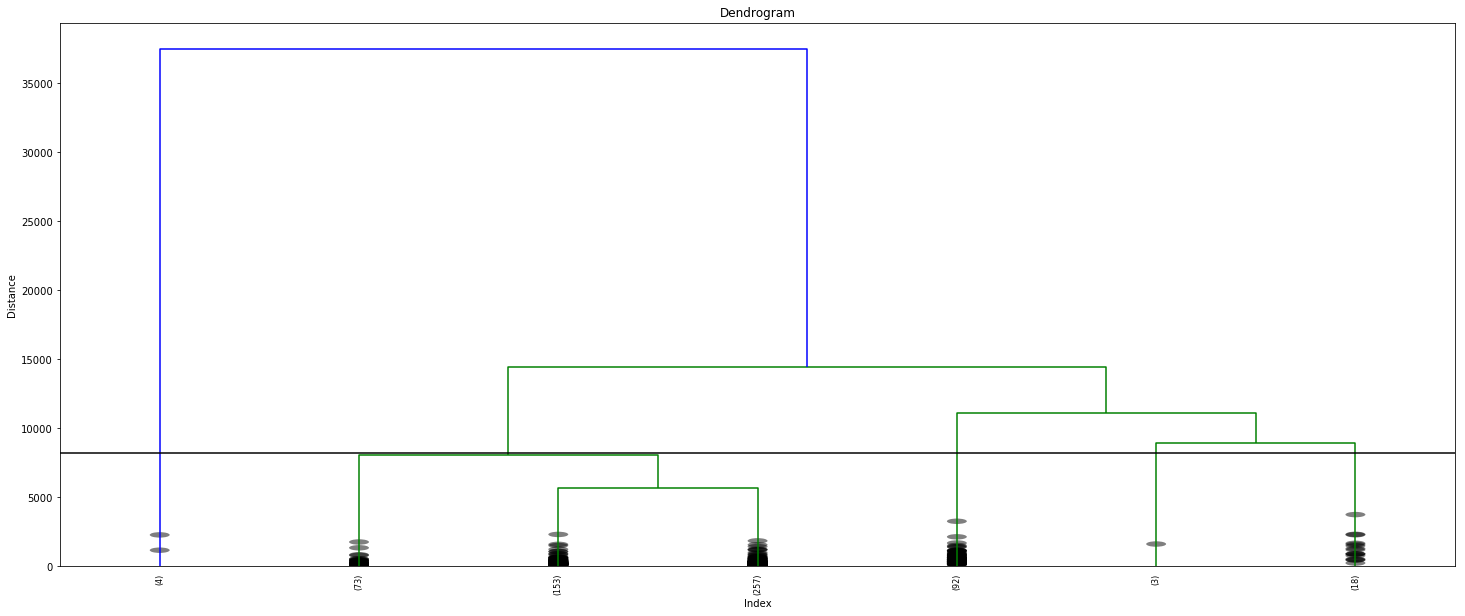

In [25]:
# max_d
plot_dendrogram("Dendrogram", "Index", "Distance", z, p = 7, max_d = 8200)

In [26]:
# max_distance에 해당하는 선을 Dendrogram에 그려서 원하는 k를 표현하기 위한 max_distance를 확정한다.

##### predicted_labels : `scipy.cluster.hierarchy.fcluster`

In [27]:
# import packages
from scipy.cluster.hierarchy import fcluster

In [28]:
# predicted_labels
predicted_labels = fcluster(z, 8200, criterion = 'distance') 
predicted_labels # 0부터가 아니라 1부터 시작함. sklearn과 다름

array([2, 2, 3, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 5,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 3, 2, 5, 2,
       2, 2, 2, 3, 3, 2, 2, 3, 2, 3, 5, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 3, 2, 5, 2, 2, 2, 3,
       2, 2, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 5, 3, 3, 4, 2, 2, 3, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 5, 3,
       3, 5, 3, 3, 2, 5, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 2, 2,
       3, 2, 3, 3, 5, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 5, 2, 2, 2, 2,
       3, 2, 3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 2, 1, 3, 2, 2, 2, 2, 2, 2, 2,
       2, 5, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 3, 3, 2, 2, 2, 2, 3, 3, 2, 2, 2, 2, 2, 4, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 1, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3,
       2, 2,

# 질문
- fcluster는 왜 X_df가 아니라 z를 받지???

In [29]:
# save to result_df
result_df['scipy_hc_labels'] = predicted_labels
result_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher,sklearn_hc_labels,scipy_hc_labels
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2
1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2
1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2
1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3


## sklearn_hc_labels와 scipy_hc_labels의 차이는?
- 질문하기

### 3. K-Means
---
##### 3-1. `sklearn.cluster.KMeans`
---
- Parameter
    - `n_cluster` - 클러스터의 개수
- Return : 모든 데이터의 Label

In [30]:
# import packages
from sklearn.cluster import KMeans

In [31]:
# set parameter
n_cluster = 5

In [32]:
# set model
kmeans_model = KMeans(n_clusters = n_cluster)

In [33]:
# fit to model
kmeans_model.fit(x_df) # k-means++ is default.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [34]:
# predicted_labels
kmeans_model.labels_
#kmeans_model.fit_predict(preprocessed_df)
kmeans_model.fit_predict(x_df)

array([0, 1, 4, 3, 0, 1, 0, 0, 4, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 3, 3, 0, 4,
       3, 3, 1, 0, 0, 0, 3, 1, 0, 3, 4, 1, 0, 3, 0, 1, 3, 0, 1, 4, 3, 2, 0,
       3, 0, 3, 1, 4, 1, 3, 4, 1, 1, 4, 1, 4, 0, 1, 1, 1, 0, 0, 0, 4, 4, 0,
       1, 0, 0, 0, 3, 1, 3, 3, 0, 4, 3, 3, 4, 1, 3, 3, 1, 0, 4, 3, 1, 0, 4,
       0, 0, 0, 0, 1, 0, 3, 0, 1, 1, 4, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 4,
       0, 1, 0, 1, 0, 1, 1, 1, 2, 4, 4, 2, 0, 0, 1, 1, 1, 0, 0, 3, 3, 0, 3,
       0, 4, 1, 1, 0, 0, 1, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 0, 4, 1,
       4, 2, 1, 4, 0, 4, 3, 1, 1, 1, 0, 3, 0, 4, 0, 4, 0, 4, 0, 0, 1, 0, 3,
       1, 1, 4, 1, 2, 0, 1, 4, 3, 0, 1, 0, 0, 3, 1, 0, 0, 4, 4, 0, 0, 0, 3,
       4, 0, 1, 0, 3, 0, 1, 4, 3, 0, 3, 0, 0, 0, 2, 1, 3, 0, 3, 1, 1, 3, 3,
       0, 4, 1, 4, 0, 1, 1, 0, 4, 3, 0, 0, 0, 3, 1, 3, 3, 3, 0, 3, 3, 0, 3,
       4, 1, 0, 1, 1, 4, 0, 0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 2, 4, 3, 0, 1, 0,
       1, 0, 3, 3, 2, 1, 0, 4, 1, 0, 0, 0, 1, 0, 0, 3, 0, 0, 3, 1, 1, 0, 1,
       0, 3,

In [58]:
# cluster_centers_
kmeans_model.cluster_centers_

array([[  2.44588745e+00,   2.16017316e+00,   8.73160173e+00,
          1.91341991e+00,   3.23809524e+00,   4.62770563e+00,
          4.22077922e+00,   3.14718615e+00,   1.03896104e+00,
          1.87965368e+01,   3.84415584e+00,   1.76017316e+01,
          1.02492511e+04,   3.38095238e+01,   1.24785264e+03,
          2.50499506e+00,   3.43264001e+02,   1.22990095e+01,
          9.10411134e-01,   5.77077983e-02,   3.18810677e-02,
          2.00645188e-01,   9.60322397e-02,   3.92090070e-02,
          3.52344832e-02,   1.99861727e-02,   2.57812266e-02,
          3.11281728e-02,   2.34140501e-02,   5.28283347e-01,
          2.95546580e-01,   5.10978272e-01,   1.05029564e-01,
          8.84455844e-02,   4.66964795e-01,   1.01655876e-01,
          8.78003922e-02,   9.19293089e-02,   3.42666598e-02,
          2.26668623e-02,   2.87798245e-02,   3.75998225e-03,
          2.73549565e-02,   1.03480105e-01,   3.13412374e-02,
          0.00000000e+00,   2.64069264e-01,   1.68831169e-01,
        

113차원 데이터를 사용했으므로 각 []는 113개의 원소를 가짐
2차원 데이터를 사용해서 확인해보면 2개씩 원소가 묶인 리스트가 나오겠지

In [36]:
# add result to result_df
result_df["kmeans_labels"] = kmeans_model.labels_
result_df

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher,sklearn_hc_labels,scipy_hc_labels,kmeans_labels
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,4.0,3.0,10.0,1.0,4.0,4.0,2.0,4.0,1.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0
1010020.0,3.0,2.0,10.0,2.0,2.0,4.0,4.0,2.0,1.0,19.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,2,1
1014020.0,2.0,3.0,10.0,2.0,4.0,5.0,6.0,4.0,1.0,23.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,4
1014030.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,5.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,2,3
1014190.0,4.0,1.0,10.0,2.0,3.0,4.0,4.0,3.0,1.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0
1017020.0,4.0,3.0,10.0,2.0,3.0,4.0,5.0,2.0,1.0,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3,1
1017110.0,4.0,2.0,10.0,2.0,4.0,1.0,3.0,2.0,1.0,11.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0
1017160.0,4.0,3.0,10.0,2.0,2.0,4.0,5.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0
1017360.0,4.0,3.0,10.0,2.0,4.0,4.0,6.0,4.0,1.0,17.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3,4


### 어떨 때 어느 방법을 사용해야 할까?
- 질문하기

### 4. Analysis
---
#### 4-1. Choose k : Using Silhouette Plot
---

In [37]:
# import packages
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

In [38]:
# silhouette_avg

In [39]:
# silhouette_value of each data

In [40]:
def plot_silhouette(X_df, labels):
    cluster_labels = sorted(np.unique(labels))
    n_clusters = len(cluster_labels)
    
    plt.figure()

    # axis setting
    ax = plt.gca()
    ax.set_xlim([-0.5, 1])
    ax.set_ylim([0, X_df.shape[0] + (n_clusters + 1) * 10])

    y_lower = 10
    
    silhouette_avg = silhouette_score(X_df, labels)
    print("k : {}".format(n_clusters))
    print("silhouette_avg : {}".format(silhouette_avg))
    data_silhouette_values = silhouette_samples(X_df, labels)

    for i in cluster_labels:
        # 특정 클러스터의 silhouette 값만 추출
        ith_cluster_silhouette_values = data_silhouette_values[labels == i]
        
        # 내림차순으로 정렬
        ith_cluster_silhouette_values.sort()

        # 해당 클러스터의 크기
        size_cluster_i = len(ith_cluster_silhouette_values)
       
        # 클러스터의 silhouette을 표시할 y축 최고값 결정
        y_upper = y_lower + size_cluster_i

        # 색
        color = cm.spectral(float(i) / n_clusters)
        
        # plot silhouette
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # y축에 클러스터 이름 표시
        ax.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # 다음 클러스터의 silhouette을 표시할 최저점 조정
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("The silhouette plot for k={}".format(n_clusters))
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # silhouette 평균 값을 나타내는 선
    ax.axvline(x=silhouette_avg, color="red", linestyle="--")

    # y축 값 제거
    ax.set_yticks([])

    plt.show() 

In [41]:
# plot silhouette for choosing k
# k_candidates
# for loop
    # KMeans model
    # silhouette plot

#### 4-2. groupby()

In [42]:
# group by predicted_labels
result_df.groupby('scipy_hc_labels').mean()

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index,...,Fax Machine,Video camera/Handycam,Radio Clock,Deep Freezer,Electirc Kettle,Dish Washing Machine,Kitchen Sink,Floor Polisher,sklearn_hc_labels,kmeans_labels
scipy_hc_labels,,,,,,,,,,,,,,,,,,,,,
1,2.000000,2.000000,9.000000,2.000000,4.000000,3.000000,9.000000,2.250000,1.000000,16.250000,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.000000
2,2.412008,1.917184,7.776398,1.689441,3.175983,4.072464,3.732919,3.316770,0.904762,16.732919,...,0.010352,0.016563,0.0,0.0,0.0,0.0,0.0,0.0,2.548654,1.242236
3,2.913043,2.641304,9.652174,1.923913,3.315217,3.847826,5.945652,2.847826,1.032609,17.891304,...,0.054348,0.010870,0.0,0.0,0.0,0.0,0.0,0.0,0.793478,2.434783
4,2.333333,2.333333,10.333333,2.000000,3.333333,5.333333,6.000000,2.333333,1.000000,21.666667,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.000000
5,2.888889,2.500000,10.888889,2.000000,3.500000,4.277778,6.166667,3.333333,1.111111,19.666667,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3.555556


*Q. 지금까지 진행해온 분석의 문제점은?*
1. categorical을 numerical로 취급했음
2. scaling을 해주지 않았음. 수치형 변수 normalization해야 됨
3. 나머지 한개는 뭘까... 우리가 군집화하고 싶은 것은 '비누를 구매한 경향' 즉, 구매와 관련된 변수만으로 군집화를 해야 한다. 

나의 의문점 -> 3번이 overfitting?

In [43]:
# Hint 1
result_df.groupby('scipy_hc_labels').mean().iloc[:, :10]

,SEC,FEH,MT,SEX,AGE,EDU,HS,CHILD,CS,Affluence Index
scipy_hc_labels,,,,,,,,,,
1,2.000000,2.000000,9.000000,2.000000,4.000000,3.000000,9.000000,2.250000,1.000000,16.250000
2,2.412008,1.917184,7.776398,1.689441,3.175983,4.072464,3.732919,3.316770,0.904762,16.732919
3,2.913043,2.641304,9.652174,1.923913,3.315217,3.847826,5.945652,2.847826,1.032609,17.891304
4,2.333333,2.333333,10.333333,2.000000,3.333333,5.333333,6.000000,2.333333,1.000000,21.666667
5,2.888889,2.500000,10.888889,2.000000,3.500000,4.277778,6.166667,3.333333,1.111111,19.666667


In [44]:
# Hint 2 
x_df.iloc[:10, 11:46]

,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,...,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15,Radio/Transistor with FM
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,17.0,8025.0,24.0,818.0,1.411765,334.375000,10.193146,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.028037,0.0,0.130841,0.339564,0.0
1010020.0,25.0,13975.0,40.0,1681.5,1.600000,349.375000,12.032200,0.887299,0.096601,0.016100,...,0.026834,0.016100,0.014311,0.0,0.059034,0.000000,0.0,0.080501,0.000000,0.0
1014020.0,37.0,23100.0,63.0,1950.0,1.702703,366.666667,8.441558,0.941558,0.019481,0.038961,...,0.033550,0.010823,0.008658,0.0,0.000000,0.016234,0.0,0.561688,0.003247,0.0
1014030.0,4.0,1500.0,4.0,114.0,1.000000,375.000000,7.600000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.600000,0.000000,0.0
1014190.0,6.0,8300.0,13.0,591.0,2.166667,638.461538,7.120482,0.614458,0.144578,0.240964,...,0.000000,0.048193,0.000000,0.0,0.000000,0.000000,0.0,0.144578,0.000000,0.0
1017020.0,26.0,18175.0,41.0,1705.5,1.576923,443.292683,9.383769,1.000000,0.000000,0.000000,...,0.000000,0.006878,0.071527,0.0,0.000000,0.000000,0.0,0.066025,0.269601,0.0
1017110.0,17.0,9950.0,26.0,1007.5,1.529412,382.692308,10.125628,0.977387,0.022613,0.000000,...,0.022613,0.007538,0.000000,0.0,0.000000,0.000000,0.0,0.045226,0.103015,0.0
1017160.0,8.0,9300.0,25.0,569.5,3.125000,372.000000,6.123656,0.935484,0.000000,0.064516,...,0.000000,0.000000,0.000000,0.0,0.000000,0.008065,0.0,0.895161,0.032258,0.0
1017360.0,12.0,26490.0,27.0,3113.5,2.250000,981.111111,11.753492,0.898075,0.101925,0.000000,...,0.000000,0.000000,0.015100,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0


In [45]:
# Hint 3 : 현재 변수의 개수
x_df.columns

Index(['SEC', 'FEH', 'MT', 'SEX', 'AGE', 'EDU', 'HS', 'CHILD', 'CS',
       'Affluence Index',
       ...
       'Personal/Home Computers', 'Computer Printers', 'Fax Machine',
       'Video camera/Handycam', 'Radio Clock', 'Deep Freezer',
       'Electirc Kettle\t\t', 'Dish Washing Machine', 'Kitchen Sink',
       'Floor Polisher'],
      dtype='object', length=113)

### 5. 실습 : 비누 판매 마케팅 전략 수립을 위한 데이터 분석
---
#### 5-1. More Preprocessing
---
##### 1. Dummify: pd.get_dummies

In [46]:
# dummy variable: 가변수로 처리하는 여러가지 방법이 있지만 다음과 같이 많이 함. ex) 식습관 -> 1,2,3을 식습관_1, 식습관_2, 식습관_3 으로
want_to_get_dummies_cols = ['SEC','FEH', 'MT', 'SEX', 'AGE', 'EDU', 'CHILD', 'CS']

# SEC, EDU 등은 카테고리변수이지만 순서적 의미가 아예 없는 것이 아니므로 일단 가변수화하지 않았음. 그런데 후에 조교님은 그냥 넣으셨음.
# SEX 는 1.8로 나오면 2인 사람들이 80% 이런식으로 해석할 수도 있지만, 지금 0으로 미기재한 사람들이 있으므로 가변수화

In [47]:
dummies_df = pd.get_dummies(x_df, columns = want_to_get_dummies_cols)
dummies_df

,HS,Affluence Index,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,...,EDU_8.0,EDU_9.0,CHILD_1.0,CHILD_2.0,CHILD_3.0,CHILD_4.0,CHILD_5.0,CS_0.0,CS_1.0,CS_2.0
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,2.0,2.0,3.0,17.0,8025.0,24.0,818.00,1.411765,334.375000,10.193146,...,0,0,0,0,0,1,0,0,1,0
1010020.0,4.0,19.0,5.0,25.0,13975.0,40.0,1681.50,1.600000,349.375000,12.032200,...,0,0,0,1,0,0,0,0,1,0
1014020.0,6.0,23.0,5.0,37.0,23100.0,63.0,1950.00,1.702703,366.666667,8.441558,...,0,0,0,0,0,1,0,0,1,0
1014030.0,0.0,0.0,2.0,4.0,1500.0,4.0,114.00,1.000000,375.000000,7.600000,...,0,0,0,0,0,0,1,1,0,0
1014190.0,4.0,10.0,3.0,6.0,8300.0,13.0,591.00,2.166667,638.461538,7.120482,...,0,0,0,0,1,0,0,0,1,0
1017020.0,5.0,13.0,3.0,26.0,18175.0,41.0,1705.50,1.576923,443.292683,9.383769,...,0,0,0,1,0,0,0,0,1,0
1017110.0,3.0,11.0,4.0,17.0,9950.0,26.0,1007.50,1.529412,382.692308,10.125628,...,0,0,0,1,0,0,0,0,1,0
1017160.0,5.0,0.0,3.0,8.0,9300.0,25.0,569.50,3.125000,372.000000,6.123656,...,0,0,0,0,1,0,0,1,0,0
1017360.0,6.0,17.0,2.0,12.0,26490.0,27.0,3113.50,2.250000,981.111111,11.753492,...,0,0,0,0,0,1,0,0,1,0


##### 2. Scaling

In [48]:
#
want_to_scale_cols = x_df.columns[11:45]
preprocessed_df = dummies_df.copy()
preprocessed_df[want_to_scale_cols] = (preprocessed_df[want_to_scale_cols] - preprocessed_df[want_to_scale_cols].mean())/\
preprocessed_df[want_to_scale_cols].std() #normalizing

In [49]:
preprocessed_df[want_to_scale_cols] 

,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,Pur Vol No Promo - %,Pur Vol Promo 6 %,Pur Vol Other Promo %,...,PropCat 6,PropCat 7,PropCat 8,PropCat 9,PropCat 10,PropCat 11,PropCat 12,PropCat 13,PropCat 14,PropCat 15
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,0.120073,-0.500590,-0.410468,-0.588103,-0.462990,-0.324310,-0.438559,0.728027,-0.575347,-0.465256,...,-0.555062,-0.495041,-0.525344,-0.490413,-0.264145,-0.298244,0.829274,-0.261268,-0.021198,3.586695
1010020.0,0.889564,0.265139,0.507634,0.389641,-0.390723,-0.264012,0.052803,-0.215162,0.463515,-0.241597,...,1.531440,-0.357967,-0.419813,-0.262584,-0.264145,0.301285,-0.236281,-0.261268,-0.210415,-0.289959
1014020.0,2.043801,1.439471,1.827405,0.693664,-0.351293,-0.194501,-0.906551,0.238934,-0.365851,0.075979,...,0.173682,-0.323659,-0.454406,-0.352582,-0.264145,-0.298244,0.380680,-0.261268,1.598254,-0.252893
1014030.0,-1.130350,-1.340318,-1.558096,-1.385245,-0.621075,-0.161001,-1.131400,0.728027,-0.575347,-0.465256,...,-0.555062,-0.495041,-0.525344,-0.490413,-0.264145,-0.298244,-0.236281,-0.261268,1.742258,-0.289959
1014190.0,-0.937978,-0.465199,-1.041663,-0.845136,-0.173168,0.898092,-1.259518,-2.498548,0.979469,2.882140,...,-0.555062,-0.495041,-0.209457,-0.490413,-0.264145,-0.298244,-0.236281,-0.261268,0.030437,-0.289959
1017020.0,0.985750,0.805654,0.565015,0.416816,-0.399583,0.113530,-0.654809,0.728027,-0.575347,-0.465256,...,0.040363,-0.495041,-0.480264,0.648264,-0.264145,-0.298244,-0.236281,-0.261268,-0.264827,2.787961
1017110.0,0.120073,-0.252854,-0.295705,-0.373532,-0.417823,-0.130079,-0.456598,0.538780,-0.332163,-0.465256,...,-0.555062,-0.379527,-0.475937,-0.490413,-0.264145,-0.298244,-0.236281,-0.261268,-0.343004,0.886120
1017160.0,-0.745605,-0.336505,-0.353087,-0.869480,0.194756,-0.173061,-1.525852,0.188096,-0.575347,0.430983,...,-0.555062,-0.495041,-0.525344,-0.490413,-0.264145,-0.298244,0.070209,-0.261268,2.851698,0.078317
1017360.0,-0.360859,1.875744,-0.238324,2.011100,-0.141175,2.275515,-0.021663,-0.124978,0.520772,-0.465256,...,1.130106,-0.495041,-0.525344,-0.250027,-0.264145,-0.298244,-0.236281,-0.261268,-0.512998,-0.289959


In [50]:
list(preprocessed_df.columns)

['HS',
 'Affluence Index',
 'No. of Brands',
 'Brand Runs',
 'Total Volume',
 'No. of  Trans',
 'Value',
 'Trans / Brand Runs',
 'Vol/Tran',
 'Avg. Price ',
 'Pur Vol No Promo - %',
 'Pur Vol Promo 6 %',
 'Pur Vol Other Promo %',
 'Br. Cd. 57, 144',
 'Br. Cd. 55',
 'Br. Cd. 272',
 'Br. Cd. 286',
 'Br. Cd. 24',
 'Br. Cd. 481',
 'Br. Cd. 352',
 'Br. Cd. 5',
 'Others 999',
 'Pr Cat 1',
 'Pr Cat 2',
 'Pr Cat 3',
 'Pr Cat 4',
 'PropCat 5',
 'PropCat 6',
 'PropCat 7',
 'PropCat 8',
 'PropCat 9',
 'PropCat 10',
 'PropCat 11',
 'PropCat 12',
 'PropCat 13',
 'PropCat 14',
 'PropCat 15',
 'Radio/Transistor with FM',
 'Radio/Transistor without FM',
 'Stereo/Mono Tape Recorder',
 'Two-in-one',
 'Hi-Fi System/Music System without Compact disk',
 'Hi-Fi System/Music System with Comapct disk',
 'Walkman with FM',
 'Walkman without FM',
 'Discman with FM',
 'Discman without FM',
 'Video (VCP/VCR)',
 'Laser Discs VCD/LD/DVD',
 'TV - Black & White',
 'Colour TV with remote',
 'Colour TV without remote',

#### 5-2. 비누 구매 고객 세분화
---
- 구매 행동(구매량, 빈도, 할인에 대한 민감성, 브랜드 충성도), 구매 기반(가격, 구매제의) 등의 변수를 이용하여 군집화하라
- 어떤 군집화 방법을 선택할 것인가? 그 이유는 무엇인가?
- k는 몇 개로 선택할 것인가? 한번에 진행 가능한 마케팅 전략이 2~5개라고 할 때 k의 개수는 타당한가? 

##### 변수 선택
---

- SEX: 여성이 위생, 청결에 더 민감할 것이라고 판단
- HS: 가족 수가 많을 수록 비누 구매량이 많을 것이라 판단

- No.of brands
- Brand Runs: 충성도와 관련될 듯
- Trans / Brand Runs: 이것도 충성도
- Avg.price: 비싼거 사는지, 싼거사는지
- Pur Vol No Promo - %
- Pur Vol Promo 6
- Pur Vol Other Promo

- Br.Cd ...

- Price Cat 1~4
- Proposition 5~15

In [51]:
# Select Features
selected_features = ['HS',
                     'Brand Runs',
                     'Trans / Brand Runs',
                     'Vol/Tran',
                     'Avg. Price ',
                     'Pur Vol No Promo - %',
                     'Pur Vol Promo 6 %',
                     'Pur Vol Other Promo %',
                     'Br. Cd. 57, 144',
                     'Br. Cd. 55',
                     'Br. Cd. 272',
                     'Br. Cd. 286',
                     'Br. Cd. 24',
                     'Br. Cd. 481',
                     'Br. Cd. 352',
                     'Br. Cd. 5',
                     'Others 999',
                     'Pr Cat 1',
                     'Pr Cat 2',
                     'Pr Cat 3',
                     'Pr Cat 4',
                     'PropCat 5',
                     'PropCat 6',
                     'PropCat 7',
                     'PropCat 8',
                     'PropCat 9',
                     'PropCat 10',
                     'PropCat 11',
                     'PropCat 12',
                     'PropCat 13',
                     'PropCat 14',
                     'PropCat 15',
                     'SEX_0.0',
                     'SEX_1.0',
                     'SEX_2.0']

selected_df = preprocessed_df[selected_features]

##### 방법 선정
---

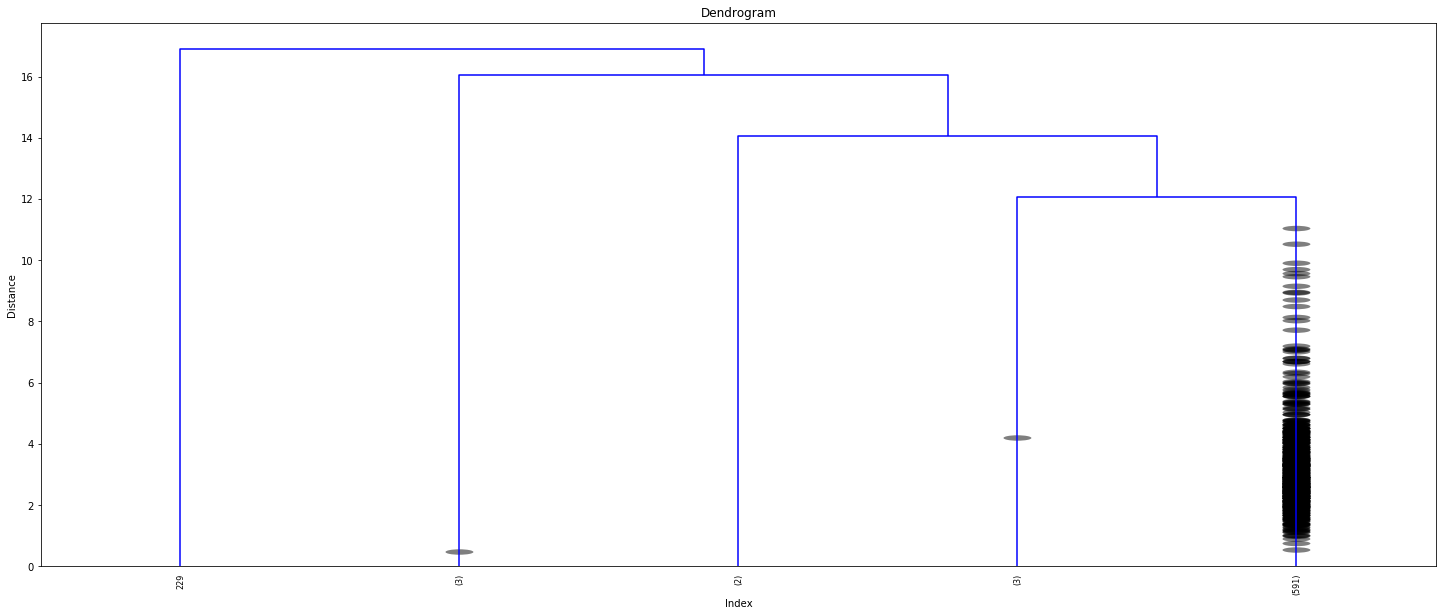

In [52]:
# Choose Methods
from scipy.cluster.hierarchy import linkage

link = linkage(selected_df, 'centroid')
plot_dendrogram("Dendrogram", "Index", "Distance", link, p=5)

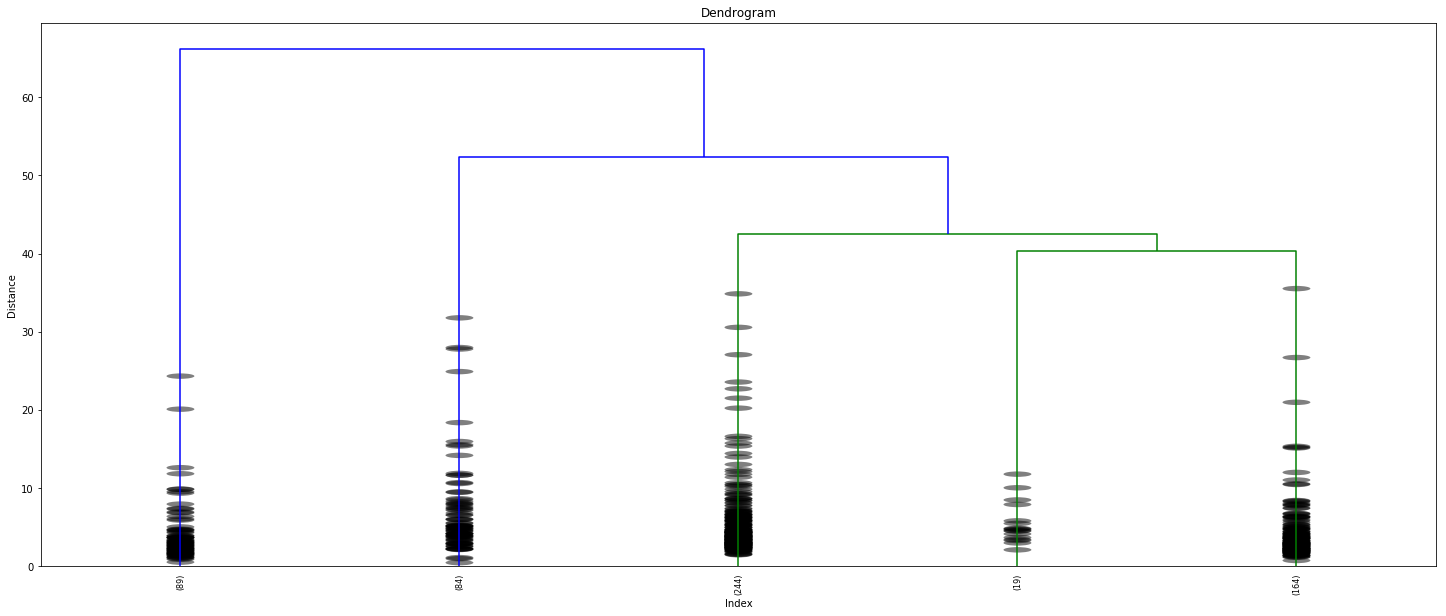

In [53]:
link = linkage(selected_df, 'ward')
plot_dendrogram("Dendrogram", "Index", "Distance", link, p=5)

##### k 선정
---

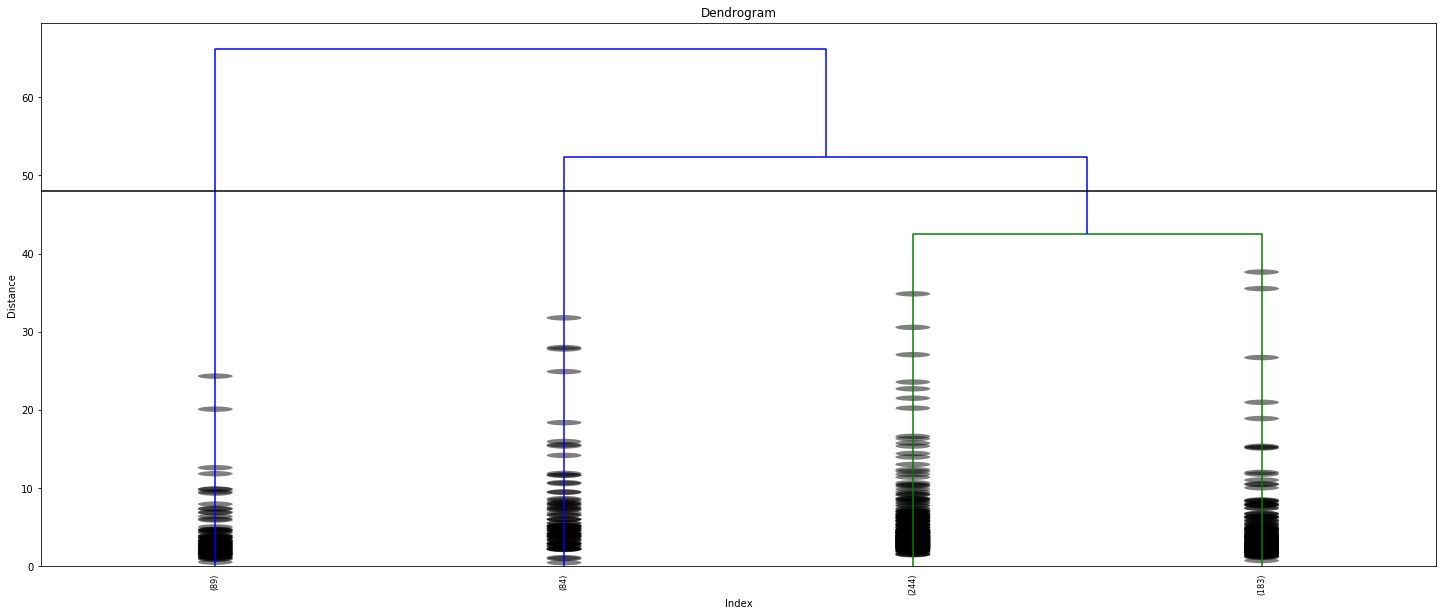

In [54]:
# Choose k
link = linkage(selected_df, 'ward')
plot_dendrogram("Dendrogram", "Index", "Distance", link, p=4, max_d = 48)

In [55]:
predicted_labels_bath_soap = fcluster(link, 48, criterion='distance')
preprocessed_df['predicted_labels'] = predicted_labels_bath_soap
preprocessed_df

,HS,Affluence Index,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,...,EDU_9.0,CHILD_1.0,CHILD_2.0,CHILD_3.0,CHILD_4.0,CHILD_5.0,CS_0.0,CS_1.0,CS_2.0,predicted_labels
Member id,,,,,,,,,,,,,,,,,,,,,
1010010.0,2.0,2.0,3.0,0.120073,-0.500590,-0.410468,-0.588103,-0.462990,-0.324310,-0.438559,...,0,0,0,0,1,0,0,1,0,3
1010020.0,4.0,19.0,5.0,0.889564,0.265139,0.507634,0.389641,-0.390723,-0.264012,0.052803,...,0,0,1,0,0,0,0,1,0,3
1014020.0,6.0,23.0,5.0,2.043801,1.439471,1.827405,0.693664,-0.351293,-0.194501,-0.906551,...,0,0,0,0,1,0,0,1,0,1
1014030.0,0.0,0.0,2.0,-1.130350,-1.340318,-1.558096,-1.385245,-0.621075,-0.161001,-1.131400,...,0,0,0,0,0,1,1,0,0,1
1014190.0,4.0,10.0,3.0,-0.937978,-0.465199,-1.041663,-0.845136,-0.173168,0.898092,-1.259518,...,0,0,0,1,0,0,0,1,0,3
1017020.0,5.0,13.0,3.0,0.985750,0.805654,0.565015,0.416816,-0.399583,0.113530,-0.654809,...,0,0,1,0,0,0,0,1,0,3
1017110.0,3.0,11.0,4.0,0.120073,-0.252854,-0.295705,-0.373532,-0.417823,-0.130079,-0.456598,...,0,0,1,0,0,0,0,1,0,3
1017160.0,5.0,0.0,3.0,-0.745605,-0.336505,-0.353087,-0.869480,0.194756,-0.173061,-1.525852,...,0,0,0,1,0,0,1,0,0,1
1017360.0,6.0,17.0,2.0,-0.360859,1.875744,-0.238324,2.011100,-0.141175,2.275515,-0.021663,...,0,0,0,0,1,0,0,1,0,3


In [56]:
preprocessed_df.groupby("predicted_labels").mean()

,HS,Affluence Index,No. of Brands,Brand Runs,Total Volume,No. of Trans,Value,Trans / Brand Runs,Vol/Tran,Avg. Price,...,EDU_8.0,EDU_9.0,CHILD_1.0,CHILD_2.0,CHILD_3.0,CHILD_4.0,CHILD_5.0,CS_0.0,CS_1.0,CS_2.0
predicted_labels,,,,,,,,,,,,,,,,,,,,,
1,4.112360,9.696629,3.303371,-0.519729,0.241808,-0.193193,-0.347620,0.767655,0.410914,-1.171411,...,0.000000,0.000000,0.101124,0.202247,0.044944,0.483146,0.168539,0.258427,0.550562,0.191011
2,1.559524,10.428571,2.940476,-0.441015,-0.795061,-0.605155,-0.412108,-0.275724,-0.390883,1.183408,...,0.023810,0.000000,0.071429,0.083333,0.047619,0.226190,0.571429,0.583333,0.392857,0.023810
3,4.725995,19.843091,3.843091,0.195085,0.106005,0.159314,0.153525,-0.105762,-0.008752,0.011357,...,0.025761,0.004684,0.103044,0.281030,0.124122,0.480094,0.011710,0.063232,0.845433,0.091335


#### 5-3. 타겟 클러스터 선정 및 마케팅 기획
---
* 분석된 세분화에서 두 개의 클러스터를 선정하고, 그 집단의 특성에 대해 분석하시오.
* 선정한 두 클러스터에 대한 마케팅 전략을 수립하시오.

#### 클러스터 선정 및 분석
---


In [57]:
# Analysis

#### 마케팅 전략
---